# ML in Cybersecurity: Task I

## Team
  * **Team name**:  *fill this in*
  * **Members**:  *fill this in. format: name1 (email1), name2 (email2), ...*


## Logistics
  * **Due date**: 11th November 2021, 23:59:59 (email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland)
  * Please include your team name and the task number in the file name and the email subject
  * Complete this in **teams of 3**
  * Feel free to use the forum or the mailing list to find group members.
  
## Timeline
  * 29-Oct-2021: Task 1 hand-out
  * **11-Nov-2021** (23:59:59): Email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland
  * 12-Nov-2021: Task 1 discussion and summary
  
  
## About this task
In this task, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this task are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this task will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your task report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [1]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [2]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.

# We only support sklearn and pytorch.

# Please set random seed to have reproduceable results, e.g. torch.manual_seed(123)
import torch
import torchvision
import torchvision.transforms as transforms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from joblib import dump, load

torch.manual_seed(123)


Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [3]:
def identity_func(foo):
    return foo


#
#
# ------- Your Code -------
#
#

def sort_list(a, b, c):
    """
    Sort two list and use the same order to sort third list.
    """
    dic_train = {k: v for k, v in zip(a, b)}
    dic_train = {k: v for k, v in sorted(dic_train.items(), key=lambda item: item[1])}
    dic_test = {k: v for k, v in zip(a, c)}
    for k,v in dic_train.items():
        dic_train[k] = [v, dic_test[k]]
    a = list(dic_train.keys())
    train_val = list(dic_train.values())
    train = [item[0] for item in train_val]
    val = [item[1] for item in train_val]
    return a, train, val


def create_predefined_splits(len_train, len_test):
    """ Predefined split
    """
    # The indices which have the value -1 will be kept in train.
    train_indices = np.full((len_train,), -1)

    # The indices which have zero or positive values, will be kept in test
    test_indices = np.full((len_test,), 0)
    test_fold = np.append(train_indices, test_indices)

    return PredefinedSplit(test_fold)


# You can use this function to flatten 2D inputs
def flatten_input_pixels(x_input):
    result = []
    for i in range(len(x_input)):
        result.append(x_input[i].flatten())
    return np.array(result, np.uint8)  # [n_samples, n_features]


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)
    
    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets
def vis_predictions(x_eval, y_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('True label: {0}, Predicted label: {1}'.format(y_eval[ids[(i*rows)+j]], 
                                                                              y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)


    plt.tight_layout()  

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint train, val, and test splits!

In [4]:
# Loading MNIST dataset using torchvision.datasets
train_set = torchvision.datasets.MNIST(root='.', train=True, transform=None, download=True)
test_set = torchvision.datasets.MNIST(root='.', train=False, transform=None, download=True)

# Separate out valiation data from train set to be used in later parts
val_frac = 0.1
k = int(len(train_set.targets) * (1 - val_frac))
x_trainval_3d = train_set.data
y_trainval = train_set.targets

# Train
x_train_3d = torch.tensor(x_trainval_3d.tolist()[:k])
y_train = torch.tensor(y_trainval.tolist()[:k])

# Validation
x_val_3d = torch.tensor(x_trainval_3d.tolist()[k:])
y_val = torch.tensor(y_trainval.tolist()[k:])

# Test
x_test_3d = test_set.data
y_test = test_set.targets

print('x_train.shape = {},  y_train.shape = {}'.format(x_train_3d.shape, y_train.shape))
print('x_val.shape = {},  y_val.shape = {}'.format(x_val_3d.shape, y_val.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test_3d.shape, y_test.shape))


# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 1.0
x_trainval_3d = x_trainval_3d[:int(len(x_trainval_3d)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]


x_train.shape = torch.Size([54000, 28, 28]),  y_train.shape = torch.Size([54000])
x_val.shape = torch.Size([6000, 28, 28]),  y_val.shape = torch.Size([6000])
x_test.shape = torch.Size([10000, 28, 28]),  y_test.shape = torch.Size([10000])


#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

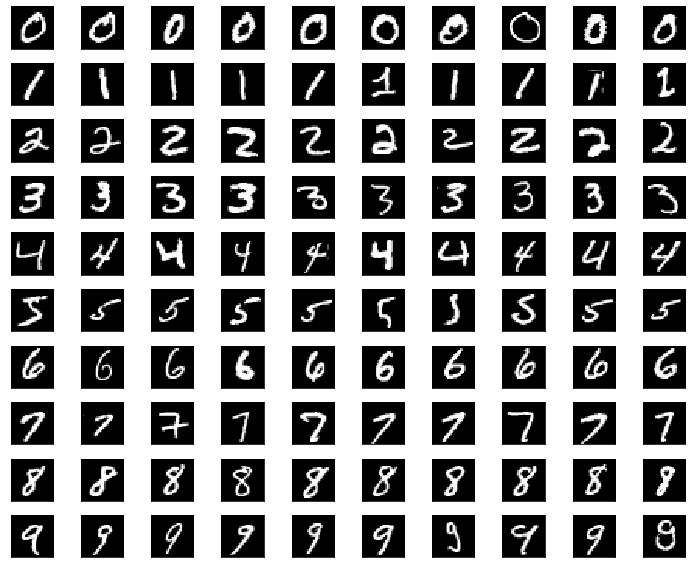

In [ ]:
# Visualize 10 examples of 10 classes. You can extend the following code:
rows, cols = 10, 10
fig,ax = plt.subplots(nrows = rows, ncols = cols)

for row in range(rows):
    idx = y_trainval==row
    y_sample = y_trainval[idx]
    x_sample = x_trainval_3d[idx]
    for col in range(cols):
        ax[row, col].imshow(x_sample[col], cmap='gray')
        ax[row, col].set_xticks([]), ax[row, col].set_yticks([])
#         ax[row, col].set_title("lab: {}".format(y_sample[col]))
        

fig.tight_layout()
plt.savefig('fig1.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# You can see an output example in the follow:

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings







## 2.1: Model [M1]: *fill-this-in* (25 points)

**Short description **: *fill this in*

### 2.1.1: Hyper-parameters

Define hyper-parameters for your model here

In [ ]:
param_grid = {
    "knn__n_neighbors": [3, 4, 5, 6, 7],
    "knn__weights": ['uniform', 'distance'],
    "knn__algorithm": ['auto'],
    "knn__metric": ['euclidean','manhattan','chebyshev']
}

# degree = np.asarray([1,2,3]) # example

## We dont this anymore, we have already defined train, val and test while pre-processing dataset.
# test_set = 'val'  #  or 'test'
# # Decide all your hyperparameters based on validation performance
# # Then, switch to 'test' for final evaluation

# if test_set == 'val':
#     train_idxs, val_idxs = ..., ...   # Fill in
#     x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
#     x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
# else:
#     x_train, y_train = x_trainval, y_trainval
#     x_eval, y_eval = x_test, y_test



### 2.1.2: Data Preprocessing


In [ ]:
# Flatten: [54000, 28, 28] into [54000, 784], normalization to be done in the pipeline.
x_train_np = torch.flatten(x_train_3d, start_dim=1, end_dim=2).numpy()
x_val_np = torch.flatten(x_val_3d, start_dim=1, end_dim=2).numpy()
x_test_np = torch.flatten(x_test_3d, start_dim=1, end_dim=2).numpy()

y_train_np = y_train.numpy()
y_val_np = y_val.numpy()
y_test_np = y_test.numpy()

# Use only a part of trainset~ 20% for GridSearch parameter estimation.
k = int(len(y_train_np) * 0.2)
# Use pre-defined split to explicitly specity train and test in GridSearchCV
ps = create_predefined_splits(len(x_train_np[:k]), len(x_val_np))
x_train_val = np.append(x_train_np[:k], x_val_np, axis=0)
y_train_val = np.append(y_train_np[:k], y_val_np, axis=0)
print('x_train_val.shape = {},  y_train_val.shape = {}'.format(x_train_val.shape, y_train_val.shape))

x_train_val.shape = (16800, 784),  y_train_val.shape = (16800,)


### 2.1.3: Model

Define your model here

In [ ]:
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scale', StandardScaler()), ("knn", knn)])
search = GridSearchCV(pipe, param_grid, n_jobs=10, verbose=2, cv=ps, return_train_score=True)
print(search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=10,
             param_grid={'knn__algorithm': ['auto'],
                         'knn__metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'knn__n_neighbors': [3, 4, 5, 6, 7],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, verbose=2)


### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [ ]:
_ = search.fit(x_train_val, y_train_val)

Fitting 1 folds for each of 30 candidates, totalling 30 fits


### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


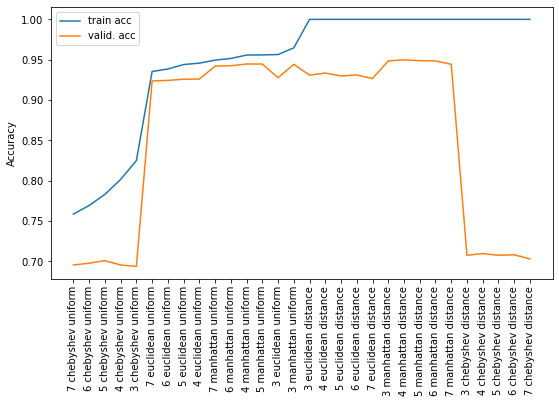

In [ ]:
# Evaluate models with different parameters and
# plot score (accuracy) for each model (not using the pre-defined function).

params = []
for item in search.cv_results_['params']:
    params.append(str(item['knn__n_neighbors']) + " " + item['knn__metric'] + " " + item['knn__weights'])

mean_val_scores = [item for item in search.cv_results_['mean_test_score']]
mean_train_scores = [item for item in search.cv_results_['mean_train_score']]
params, mean_train_scores, mean_val_scores = sort_list(params, mean_train_scores, mean_val_scores)

fig = plt.figure(figsize=(9,5))
plt.plot(mean_train_scores, label="train acc")
plt.plot(mean_val_scores, label="valid. acc")
plt.legend()
plt.ylabel('Accuracy')
_ = plt.xticks(range(len(params)), params, rotation ='90')

In [ ]:
# Here report the score for the best model
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.950):
{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}


In [ ]:
print(search.best_estimator_)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=4,
                                      weights='distance'))])


In [ ]:
## Training on entire train set.

# best_estimator_ will by default use the same pipe as above with best parameters.
pipe = search.best_estimator_
new_knn = pipe.fit(x_train_np, y_train_np)

start = time.time()
train_score = new_knn.score(x_train_np, y_train_np)
end = time.time()

val_score = new_knn.score(x_val_np, y_val_np)

print(f"Train acc: {train_score*100:.3f}%")
print(f"Val acc: {val_score*100:.3f}%")
print(f"Fitting time on train data: {end-start:.3f} s")

Fitting on best parameters: {'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}
Train acc: 100.000%
Val acc: 97.150%
Fitting time on train data: 1196.286 s


In [ ]:
# Predict target labels for test set and generate scores, classification report.
print("Evaluating on test data")
start = time.time()
y_pred = new_knn.predict(x_test_np)
end = time.time()
print(f"Test acc: {accuracy_score(y_test_np, y_pred)*100:.3f}%")
print(classification_report(y_test_np, y_pred))
print(f"Fitting time on test data: {end-start:.3f} s")

Evaluating on test data
Test acc: 95.840%
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.95      0.95       892
           6       0.98      0.98      0.98       958
           7       0.94      0.95      0.94      1028
           8       0.98      0.91      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Fitting time on test data: 230.593 s


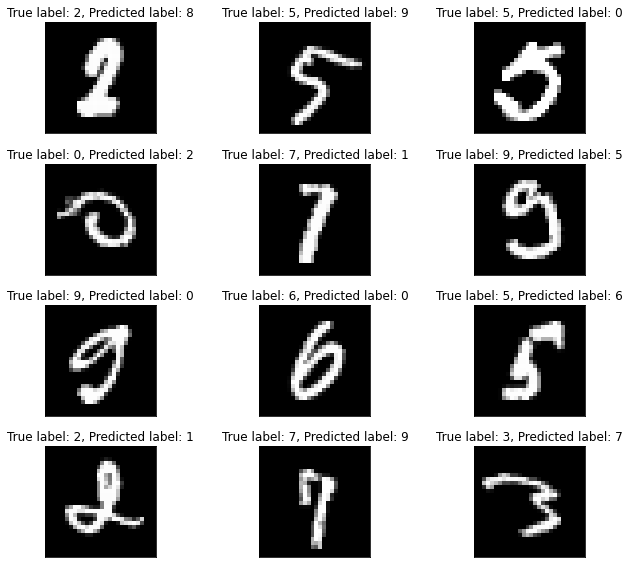

In [ ]:
# Visualize the predictions
incorr_pred = [i for i in range(len(y_pred)) if y_pred[i] != y_test_np[i]]
x_test_incorr = [x_test_np[i] for i in incorr_pred]
y_test_incorr = [y_test_np[i] for i in incorr_pred]
y_pred_incorr = [y_pred[i] for i in incorr_pred]

vis_predictions(x_test_incorr, y_test_incorr, y_pred_incorr, len(y_pred_incorr))

### 2.1.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

# 2.2: Model [M2]: *fill-this-in* (25 points)




We use Support Vector Machines (SVMs) as the second classifier. SVMs are linear classifiers that can be used to separate both linear as well as non-linear data. SVMs come under the category of maximum margin classifiers as they aim to maximize the margin (distance) between the points belonging to different classes and the decision boundary. This margin also provides robustness to SVMs as small disturbances to a data point will not change the point's class due to margin. For non-linear data SVMs apply the kernel-trick, which means the hyperplane is constructed similar to one that would be constructed if the points were in a higher dimensional space, and the kernel trick ensures that we do not have to actually transform the points to the higher dimensional space, but can obtain similar results to as if we the points were in higher dimensions. Although the computational complexity of SVMs is high, for cases where the data points are not too much, they work very well. We choose SVM in this case because they are powerful parametric classifiers and they were the most used classifiers in pre deep learning era. Different kernels would perform different transformations of the data and it would be great to see how they and their associated hyperparameters affect our results. We also wanted to see how a linear classifier performs before trying deep learning based approaches. The primal form for the optimization objective of SVM is given by-:

\begin{eqnarray*}
\min_{w,b,\xi} && \frac{1}{2} w^T w 
+ C \sum_{i=1}^n \xi_i  \\
&& \textrm{subject to} \\
&& y_i (w^T \phi(x_i) + b) \geq 1 - \xi_i, 
\nonumber \\
&& \xi_i \geq 0, i = 1, \ldots, n 
\nonumber 
\end{eqnarray*}

There are a number of hyperparameters to choose from in SVMs. Most important one is the kernel which specifies which transformation is applied on the data before the hyperplane is constructed. Then for each of the kernel we have C parameter. This can be thought of as inverse of the regularisation coefficient lambda in other ML models. So higher C implies less regularisation and lower C implies more regularisation. Then for 'rbf' (gaussian) kernel we have gamma which specifies the inverse of influence of a point on the other points. So higher gamma means low influence and lower gamma means more influence. So, higher gamma will make the decision boundary more complex and vice versa.

### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [7]:
# Defining the parameter grid.
param_grid = [
               {"svc__kernel": ["linear"], "svc__C": [0.1, 1, 10]},
               {"svc__kernel": ["rbf"], "svc__gamma": [0.001, 0.01, 0.1, 1, 2], "svc__C": [0.1, 1, 10]},
               {"svc__kernel": ["poly"], "svc__degree": [3, 4, 5], "svc__C": [0.1, 1, 10]}
]

### 2.2.2: Data Preprocessing


In [8]:
# Flatten: [54000, 28, 28] into [54000, 784], normalization to be done in the pipeline.
x_train_np = torch.flatten(x_train_3d, start_dim=1, end_dim=2).numpy()
x_val_np = torch.flatten(x_val_3d, start_dim=1, end_dim=2).numpy()
x_test_np = torch.flatten(x_test_3d, start_dim=1, end_dim=2).numpy()

y_train_np = y_train.numpy()
y_val_np = y_val.numpy()
y_test_np = y_test.numpy()

# Use only a part of trainset~ 20% for GridSearch parameter estimation.
k = int(len(y_train_np) * 0.2)
# Use pre-defined split to explicitly specity train and test in GridSearchCV
ps = create_predefined_splits(len(x_train_np[:k]), len(x_val_np))
x_train_val = np.append(x_train_np[:k], x_val_np, axis=0)
y_train_val = np.append(y_train_np[:k], y_val_np, axis=0)
print('x_train_val.shape = {},  y_train_val.shape = {}'.format(x_train_val.shape, y_train_val.shape))

x_train_val.shape = (16800, 784),  y_train_val.shape = (16800,)


### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [7]:
svc = SVC()
pipe = Pipeline(steps=[('scale', StandardScaler()), ("svc", svc)])
grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=ps, return_train_score=True)
print(grid_search)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probabilit...
                                            tol=0.001, verbose=False))]

### 2.2.4: Fit Model


In [8]:
start_time = time.time()
grid_search.fit(x_train_val, y_train_val)
end_time = time.time()
end_time - start_time

5891.026125431061

### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions


In [43]:
mean_val_scores = grid_search.cv_results_["mean_test_score"]
mean_train_scores = grid_search.cv_results_["mean_train_score"]
params_names = grid_search.cv_results_["params"]

print("Train_accuracy\tValidation Accuracy\tParameters")
for mean_train, mean_val, param in zip(mean_train_scores, mean_val_scores, params_names):
    print("%0.3f            %0.3f               %r" % (mean_train, mean_val, param))

Train_accuracy	Validation Accuracy	Parameters
0.997            0.930               {'svc__C': 0.1, 'svc__kernel': 'linear'}
1.000            0.924               {'svc__C': 1, 'svc__kernel': 'linear'}
1.000            0.924               {'svc__C': 10, 'svc__kernel': 'linear'}
0.907            0.907               {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
0.534            0.504               {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
0.113            0.105               {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.113            0.105               {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
0.113            0.105               {'svc__C': 0.1, 'svc__gamma': 2, 'svc__kernel': 'rbf'}
0.976            0.948               {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
1.000            0.778               {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
1.000            0.185               {'svc__C': 1, 'svc__gamma': 0.

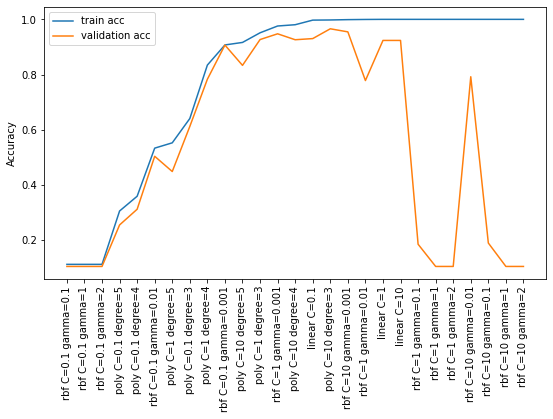

In [45]:
# Plotting the scores for the models on the training and the validation set.
params = []
for item in params_names:
    if item["svc__kernel"] == "linear":
        params.append(item["svc__kernel"] + " C=" + str(item["svc__C"]))
    elif item["svc__kernel"] == "rbf":
        params.append(item["svc__kernel"] + " C=" + str(item["svc__C"]) + " gamma=" + str(item["svc__gamma"]))
    else:
        params.append(item["svc__kernel"] + " C=" + str(item["svc__C"]) + " degree=" + str(item["svc__degree"]))

params, mean_train_scores, mean_val_scores = sort_list(params, mean_train_scores, mean_val_scores)

fig = plt.figure(figsize=(9,5))
plt.plot(mean_train_scores, label="train acc")
plt.plot(mean_val_scores, label="validation acc")
plt.legend()
plt.ylabel('Accuracy')
_ = plt.xticks(range(len(params)), params, rotation ='90')

In [55]:
# Showing the best score on the validation set as well as the best parameters.
print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
print(grid_search.best_params_)

Best parameter (CV score=0.966):
{'svc__C': 10, 'svc__degree': 3, 'svc__kernel': 'poly'}


In [12]:
# Training the model using the best hyperparameters found and then using it to calculate the test accuracy.
best_model = Pipeline(steps=[('scale', StandardScaler()), ("svc", SVC(kernel='poly', degree=3, C=10))])

start_time = time.time()
best_model.fit(x_train_np, y_train_np)
end_time = time.time()
print(end_time - start_time)

774.0349082946777


In [13]:
# Saving the trained best model
dump(best_model, 'svm.joblib') 

['svm.joblib']

In [14]:
# Evaluating the model on the test data
print("Evaluating on test data")
y_pred = best_model.predict(x_test_np)
print(f"Test acc: {accuracy_score(y_test_np, y_pred)*100:.3f}%")
print(classification_report(y_test_np, y_pred))

Evaluating on test data
Test acc: 97.500%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.98     10000



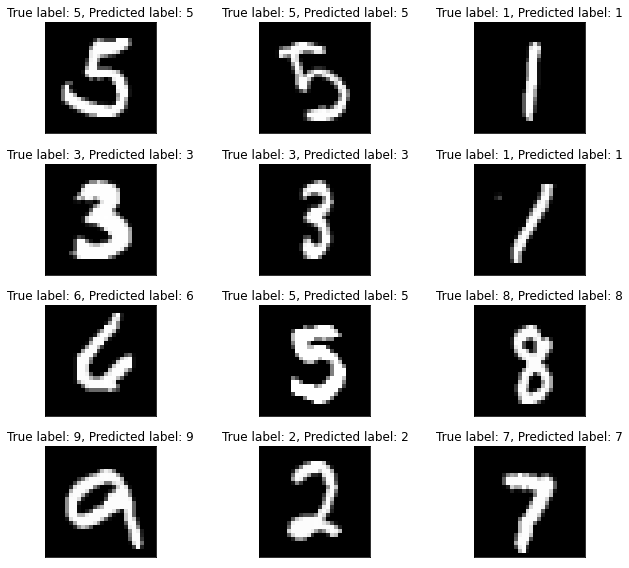

In [25]:
# Visualize the predictions
vis_predictions(x_test_np, y_test_np, y_pred, len(y_pred))

### 2.2.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

We achieved an overall test accuracy of 97.5% by using SVM. The most influential parameters which we observed were gamma in the case of rbf kernel, and regularisation parameter C in the case of polynomial kernel. We observed that the linear kernel did not show any significant variations in results when we changed C. Although linear kernel achieved almost perfect train accuracy in almost all the cases of C. This indicates that the model might be overfitting to the data. In the case of rbf kernel, we observed that using values of gamma which were greater than 0.1 almost always resulted in very bad performance on the test set. We also observed that using high gamma and low C results in the model not learning anything. In that case, model even showed accuracy equivalent to random guessing on both the training and the test set. Using gamma=0.001 and C=1 showed the best results for rbf kernel. Further increasing C with this gamma value lead to overfitting on data. The results showed that gamma is a very important parameter in case of SVMs and tuning it properly is very important. In the case of polynomial kernel, we observed that increasing the degree of the polynomial kernel resulted in a decrease in the performance for all the values of C. As expected, increasing C led to an increase in the accuracies in the polynomial kernel. Also looking at the confusion matrices for the test data, we observed that the F1-scores for 8 and 9 are lower than the rest, it might be due to visual similarity of 8 and 9, and our model did not have enough capacity to distinguish them everytime. One interesting insight was the influence of gamma on the results. It was interesting to see gamma has such a major influence on the results. We used part of the data for hyperparameter tuning due to computational reasons. We believe using more data and using bigger ranges for hyperparameter search would definitely improve the results on the test data.

# 2.3: Model [M3] (Neural Networks): *fill-this-in* (25 points)



### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [ ]:
#
#
# ------- Your Code -------
#
#
batch_size_train = ... # Fill in
batch_size_test = ... # Fill in
n_epochs = ... # Fill in
# other parameters ...


# You don't need the following code, if you can use data from 2.1.1.
# You can also use torch built-in functions (torch.utils.data)

test_set = 'val'  #  or 'test'
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

if test_set == 'val':
    train_idxs, val_idxs = ..., ...   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.3.2: Data Preprocessing


In [ ]:
#
#
# ------- Your Code -------
#
# e.g. normalize, flatten input data.


### 2.3.3: Model

Define your model here

In [ ]:
class Net(nn.Module):
    #
    #
    # ------- Your Code -------
    #
    #

### 2.2.4: Fit Model


In [ ]:
#
#
# ------- Your Code -------
#
# Example: net = Net(), ....

In [ ]:
def train(args ... # Fill in):
    #
    #
    # ------- Your Code -------
    #


In [ ]:
def test(args ... # Fill in):
    #
    #
    # ------- Your Code -------
    #

In [ ]:
# Save your model using torch.save()

### 2.2.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

In [ ]:
# Here plot epoch (# passes over training data) and loss
#
# ------- Your Code -------
#

In [ ]:
# Here plot epoch and accuracy over val/test set
#
# ------- Your Code -------
#

In [ ]:
#
#
# ------- Your Code -------
# Example:
# net = Net()
# net.load_state_dict(torch.load("PATH"))

In [ ]:
# Here report the score for the best model
#
# ------- Your Code -------
#

In [ ]:
# Visualize the predictions
# Example: vis_predictions(x_eval, y_pred, size_of_data)
#
#
# ------- Your Code -------
#

### 2.3.6: Summary

Summarize your findings:
 * Which hyper-parameters were important and how did they influence your results?
 * What were other design choices you faced?
 * Any other interesting insights...

# 3. Summary (20 points)

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend to perform digit classification and why?

Feel free to discuss other insightful observations.